In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.1
1.2.4
0.11.1


In [3]:
# Answer for 1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
df=pd.read_csv("C:/Users/Rajashri/Downloads/bank_marketing_part1_Data.csv")
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.isnull().values.any()

False

In [5]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate values = %d' % (dups.sum()))
df[dups]

Number of duplicate values = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [6]:
# Size of the dataset
print(df.shape)
print("The number of rows in the dataset are", df.shape[0])
print("The number of columns in the dataset are", df.shape[1])

(210, 7)
The number of rows in the dataset are 210
The number of columns in the dataset are 7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [9]:
df.skew().round(2)

spending                        0.40
advance_payments                0.39
probability_of_full_payment    -0.54
current_balance                 0.53
credit_limit                    0.13
min_payment_amt                 0.40
max_spent_in_single_shopping    0.56
dtype: float64

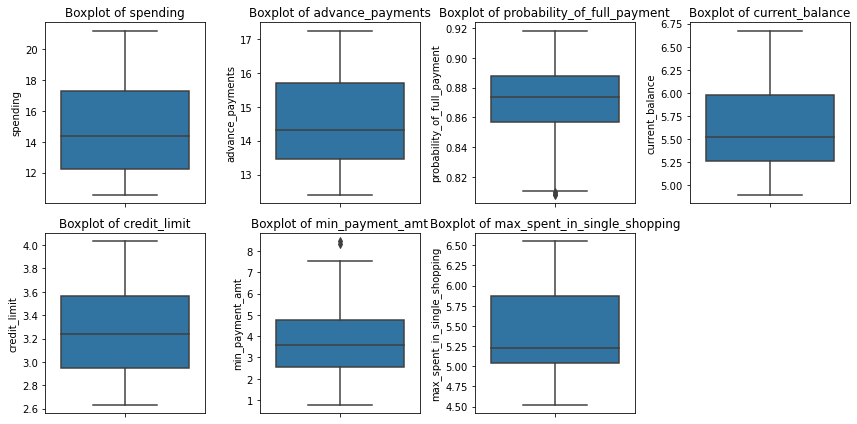

In [10]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,6))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df, orient="h")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout();

In [11]:
print("Observations:")
print("* The bank marketing dataset has 210 rows and 7 columns.")
print("* The dataset has float64 object datatype.")
print("* There are no missing values in the dataset.")
print("* No Duplicate records present in the dataset.")
print("* The mean and median values seems almost equal.")
print("* The standard deviation for spending is high as compared to other variables.")
print("* Some outliers are present in variables Probability of full payment and minimum payment amount which are treated.")
print('')
print("Basis on describe function, we can find out below summary stats:")
print('')
print("* Spending variable has (Mean is 14.847524, Standard Deviation is 2.909699 with min value 10.5900 and max value is 21.1800.")
print("also, values for Q1(25% is 12.27000), Q2 (50% is 14.35500) & Q3 (75% is 17.305000).")
print("IQR is Q3-Q1 =",17.305000-12.27000, "and Range=", 21.1800-10.5900)
print('')
print("* Advance_Payments variable has (Mean is 14.559286, Standard Deviation is 1.305959 with min value 12.4100 and")
print("max value is 17.2500.Also, values for Q1(25% is 13.45000), Q2 (50% is 14.32000) & Q3 (75% is 15.715000).")
print("IQR is Q3-Q1 =",15.715000-13.45000, "and Range=", 17.2500-12.4100)
print('')
print("* Probability_of_full_payment variable has (Mean is 0.870999, Standard Deviation is 0.023629 with min value 0.8081")
print("and max value is 0.9183. Also, values for Q1(25% is 0.85690), Q2 (50% is 0.87345) & Q3 (75% is 0.887775).")
print("IQR is Q3-Q1 =",0.887775-0.85690, "and Range=", 0.9183-0.8081)
print('')
print("* Current_Balance variable has (Mean is 5.628533, Standard Deviation is 0.443063 with min value 4.8990 and max value is 6.6750.")
print("Also, values for Q1(25% is 5.26225), Q2 (50% is 5.52350) & Q3 (75% is 5.979750).")
print("IQR is Q3-Q1 =",5.979750-5.26225, "and Range=", 6.6750-4.8990)
print('')
print("* Credit_limit variable has (Mean is 3.258605, Standard Deviation is 0.377714 with min value 2.6300 and max value is 4.0330.")
print("Also, values for Q1(25% is 2.94400), Q2 (50% is 3.23700) & Q3 (75% is 3.561750).")
print("IQR is Q3-Q1 =",3.561750-2.94400, "and Range=", 4.0330-2.6300)
print('')
print("* Min_payment_amt variable has (Mean is 3.700201, Standard Deviation is 1.503557 with min value 0.7651 and max value is 8.4560.")
print("Also, values for Q1(25% is 2.56150), Q2 (50% is 3.59900) & Q3 (75% is 4.768750).")
print("IQR is Q3-Q1 =",4.768750-2.56150, "and Range=", 8.4560-0.7651)
print('')
print("* Max_spent_in_single_shopping variable has (Mean is 5.408071, Standard Deviation is 0.491480 with min value 4.5190 and")
print("max value is 6.5500. Also, values for Q1(25% is 5.04500), Q2 (50% is 5.22300) & Q3 (75% is 5.877000).")
print("IQR is Q3-Q1 =",5.877000-5.04500, "and Range=", 6.5500-4.5190)
print('')
print("Basis on Skew function:")
print("Spending is positively Skewed with 0.40")
print("Advance_Payments is positively Skewed with 0.39")
print("Probability_of_full_payment is Negatively Skewed with -0.52")
print("Current_Balance is positively Skewed with 0.53")
print("Credit_limit is positively Skewed with 0.13")
print("Min_payment_amt is positively Skewed with 0.36")
print("Max_spent_in_single_shopping is positively Skewed with 0.56")

Observations:
* The bank marketing dataset has 210 rows and 7 columns.
* The dataset has float64 object datatype.
* There are no missing values in the dataset.
* No Duplicate records present in the dataset.
* The mean and median values seems almost equal.
* The standard deviation for spending is high as compared to other variables.
* Some outliers are present in variables Probability of full payment and minimum payment amount which are treated.

Basis on describe function, we can find out below summary stats:

* Spending variable has (Mean is 14.847524, Standard Deviation is 2.909699 with min value 10.5900 and max value is 21.1800.
also, values for Q1(25% is 12.27000), Q2 (50% is 14.35500) & Q3 (75% is 17.305000).
IQR is Q3-Q1 = 5.035 and Range= 10.59

* Advance_Payments variable has (Mean is 14.559286, Standard Deviation is 1.305959 with min value 12.4100 and
max value is 17.2500.Also, values for Q1(25% is 13.45000), Q2 (50% is 14.32000) & Q3 (75% is 15.715000).
IQR is Q3-Q1 = 2.26500

Univariate/Bivariate analysis helps us to understand the distribution of a data in the dataset. With Univariate analysis we can find the patterns and we can summarize the data.

Univariate Analysis on spending:
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64


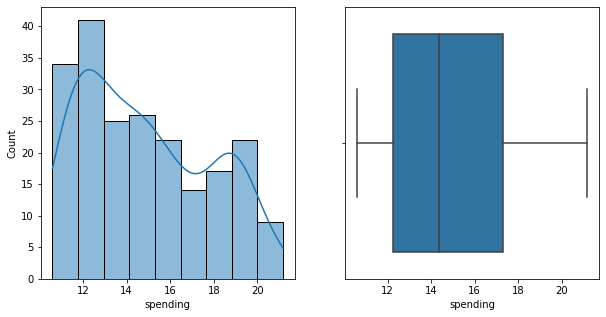

Observations:
* The Boxplot of Spending variable shows no outliers.
* The dist plot shows the distribution of data from 10 to 22.
* Spending is positively skewed 0.40.


In [12]:
#Exploratory data analysis on (Univariate, Bi-variate, and multivariate analysis).
print("Univariate/Bivariate analysis helps us to understand the distribution of a data in the dataset. With Univariate analysis we can find the patterns and we can summarize the data.")
print('')
print("Univariate Analysis on spending:")
print(df.spending.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.spending, kde=True,ax=axs[0])
sns.boxplot(x='spending',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Spending variable shows no outliers.")
print("* The dist plot shows the distribution of data from 10 to 22.")
print("* Spending is positively skewed 0.40.")

Univariate Analysis on Advance Payments:
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64


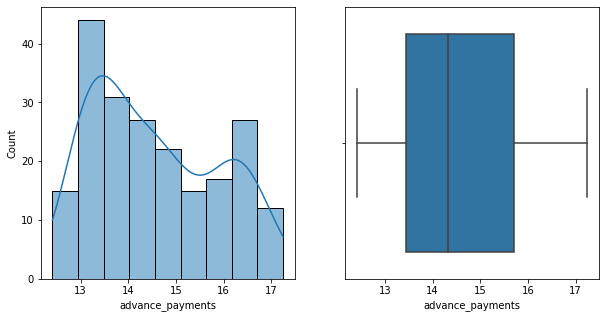

Observations:
* The Boxplot of Advance payments variable shows no outliers.
* The dist plot shows the distribution of data from 12 to 17.
* Maximum 17.25% and minimum 12.41% customers have made advanced payments.
* Advance_Payments is positively Skewed with 0.39


In [13]:
print("Univariate Analysis on Advance Payments:")
print(df.advance_payments.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.advance_payments, kde=True,ax=axs[0])
sns.boxplot(x='advance_payments',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Advance payments variable shows no outliers.")
print("* The dist plot shows the distribution of data from 12 to 17.")
print("* Maximum 17.25% and minimum 12.41% customers have made advanced payments.")
print("* Advance_Payments is positively Skewed with 0.39")

Univariate Analysis on probability_of_full_payment:
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64


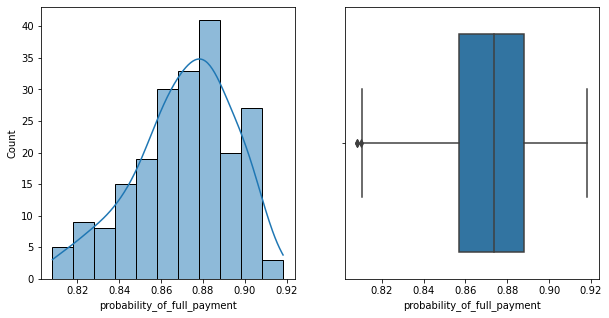

Observations:
* The Boxplot of probability_of_full_payment variable shows few outliers.
* The dist plot shows the distribution of data from 0.80 to 0.92.
* Probability_of_full_payment is Negatively Skewed with -0.54


In [14]:
print("Univariate Analysis on probability_of_full_payment:")
print(df.probability_of_full_payment.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.probability_of_full_payment, kde=True,ax=axs[0])
sns.boxplot(x='probability_of_full_payment',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of probability_of_full_payment variable shows few outliers.")
print("* The dist plot shows the distribution of data from 0.80 to 0.92.")
print("* Probability_of_full_payment is Negatively Skewed with -0.54")

Univariate Analysis on current_balance:
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64


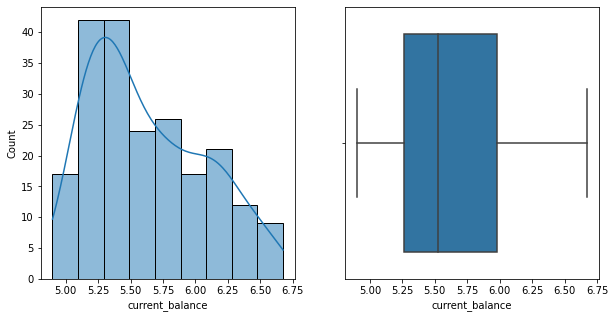

Observations:
* The Boxplot of current_balance variable have no outliers.
* Maximum 6.67% current balance left in the balance amount to make purchases.
* Current_Balance is positively Skewed with 0.53


In [15]:
print("Univariate Analysis on current_balance:")
print(df.current_balance.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.current_balance, kde=True,ax=axs[0])
sns.boxplot(x='current_balance',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of current_balance variable have no outliers.")
print("* Maximum 6.67% current balance left in the balance amount to make purchases.")
print("* Current_Balance is positively Skewed with 0.53")

Univariate Analysis on credit_limit:
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64


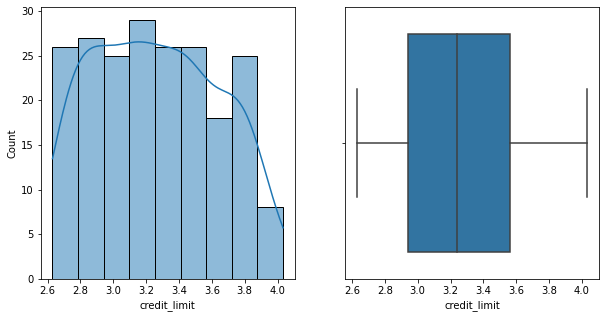

Observations:
* The Boxplot of credit_limit variable have no outliers.
* The dist plot shows distribution of data from 2.5 to 4.0.
* Credit_limit is positively Skewed with 0.13


In [16]:
print("Univariate Analysis on credit_limit:")
print(df.credit_limit.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.credit_limit, kde=True,ax=axs[0])
sns.boxplot(x='credit_limit',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of credit_limit variable have no outliers.")
print("* The dist plot shows distribution of data from 2.5 to 4.0.")
print("* Credit_limit is positively Skewed with 0.13")

Univariate Analysis on min_payment_amt:
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64


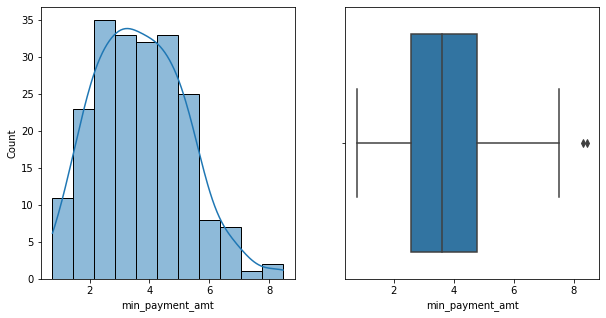

Observations:
* The Boxplot of min_payment_amt variable shows few outliers.
* The dist plot shows distribution of data from 2 to 8.
* Min_payment_amt is positively Skewed with 0.40


In [17]:
print("Univariate Analysis on min_payment_amt:")
print(df.min_payment_amt.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.min_payment_amt, kde=True,ax=axs[0])
sns.boxplot(x='min_payment_amt',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of min_payment_amt variable shows few outliers.")
print("* The dist plot shows distribution of data from 2 to 8.")
print("* Min_payment_amt is positively Skewed with 0.40")

Univariate Analysis on max_spent_in_single_shopping:
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64


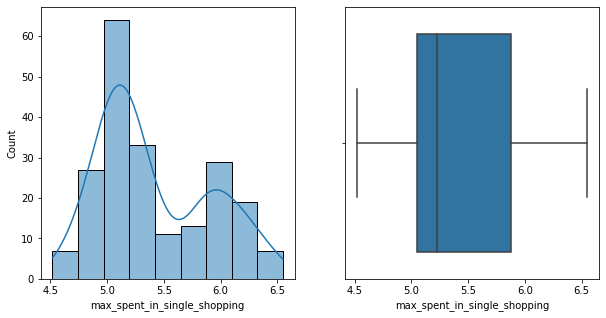

Observations:
* The Boxplot of max_spent_in_single_shopping variable have no outliers.
* The dist plot shows distribution of data from 4.5 to 6.5.
* Max_spent_in_single_shopping is positively Skewed with 0.56


In [18]:
print("Univariate Analysis on max_spent_in_single_shopping:")
print(df.max_spent_in_single_shopping.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df.max_spent_in_single_shopping, kde=True,ax=axs[0])
sns.boxplot(x='max_spent_in_single_shopping',data=df,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of max_spent_in_single_shopping variable have no outliers.")
print("* The dist plot shows distribution of data from 4.5 to 6.5.")
print("* Max_spent_in_single_shopping is positively Skewed with 0.56")

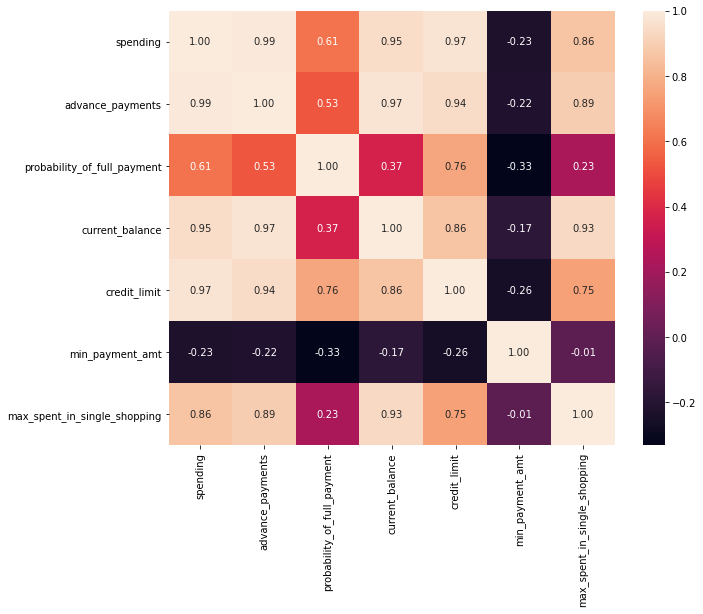

In [19]:
# Multivariate Analysis done by using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f');
plt.show()

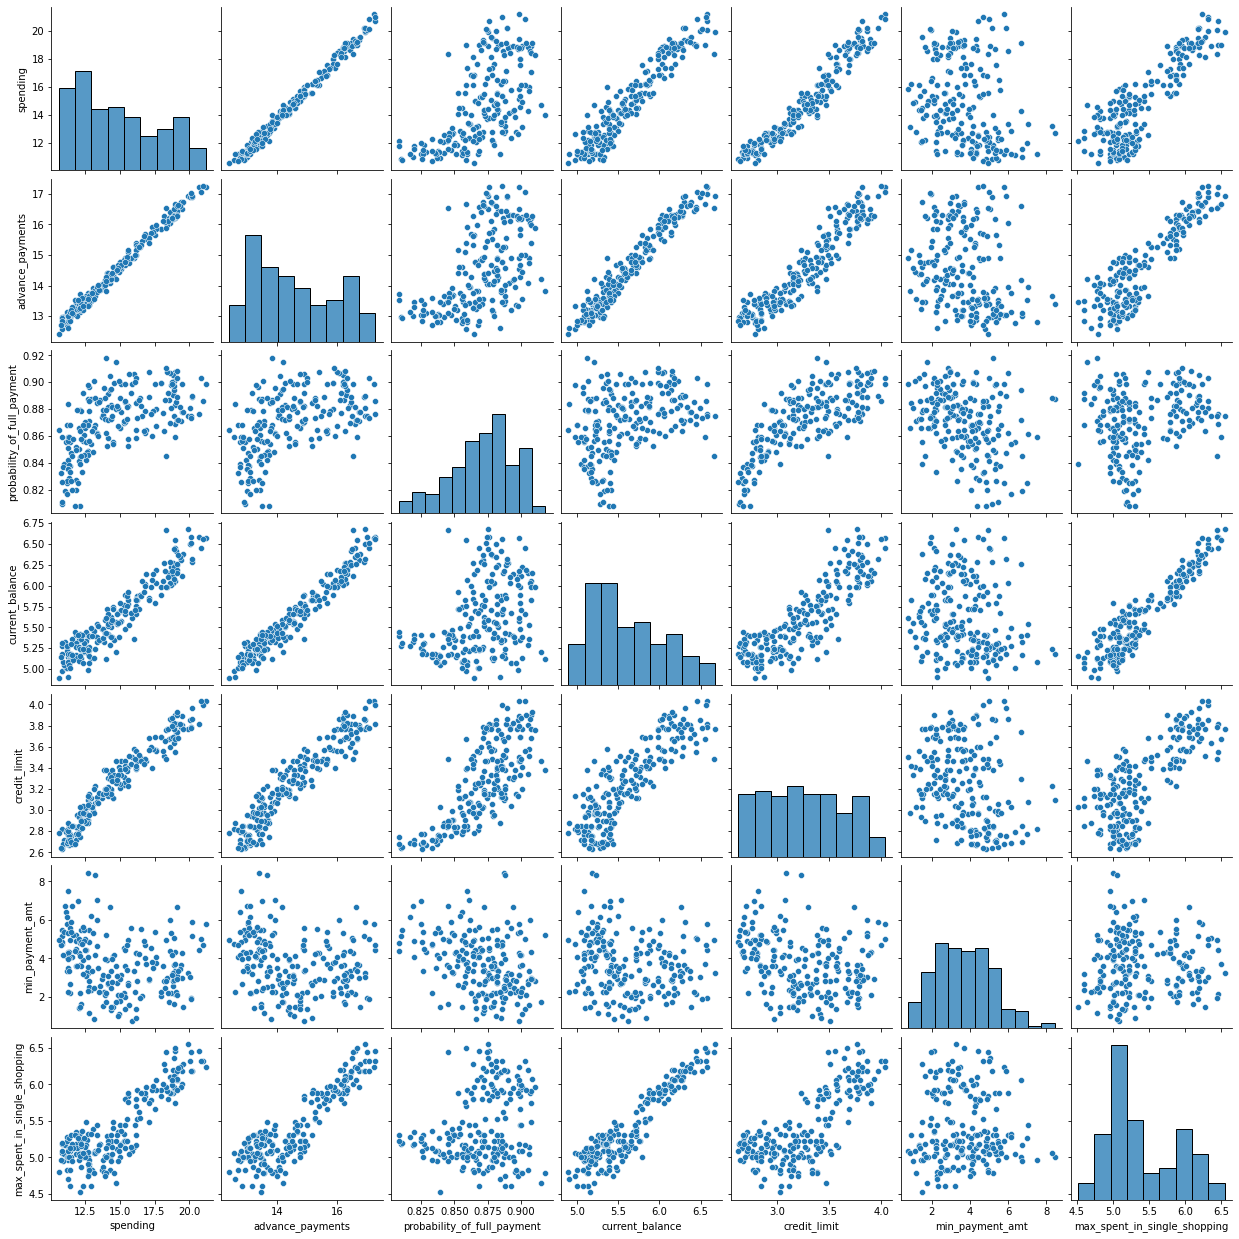

In [20]:
#Multivariate Analysis by using Pair Plot
sns.pairplot(df);

In [21]:
print("Observations:")
print("Heatmap shows correlation coefficients.")
print("Strong positive correlations between-")
print("* Spending and Advance Payments")
print("* Advance Payments and Current Balance")
print("* Credit limit and Spending")
print("* Spending and Current Balance")
print("* Credit limit and Advance payments")
print("* Max_spent_in_single_shopping and Current Balance")

Observations:
Heatmap shows correlation coefficients.
Strong positive correlations between-
* Spending and Advance Payments
* Advance Payments and Current Balance
* Credit limit and Spending
* Spending and Current Balance
* Credit limit and Advance payments
* Max_spent_in_single_shopping and Current Balance


In [22]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [23]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

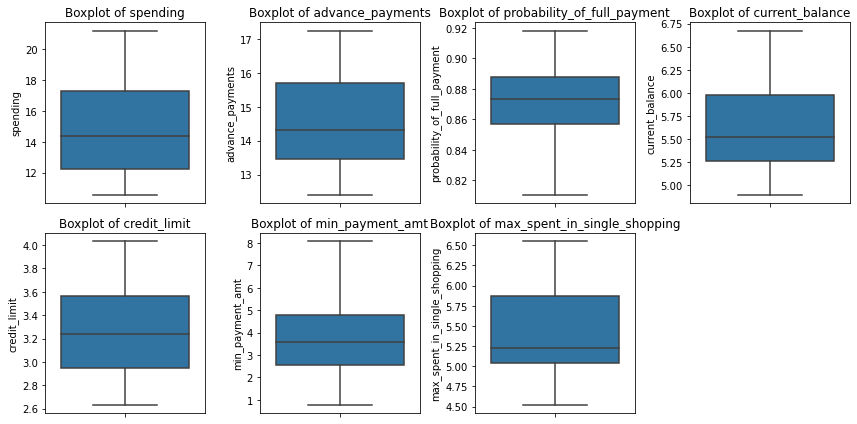

In [24]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,6))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df, orient="h")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout();

In [25]:
#Check the descriptive stats to observe scale issues between the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.590000,12.27000,14.35500,17.305000,21.180000
advance_payments,210.0,14.559286,1.305959,12.410000,13.45000,14.32000,15.715000,17.250000
probability_of_full_payment,210.0,0.871025,0.023560,0.810588,0.85690,0.87345,0.887775,0.918300
current_balance,210.0,5.628533,0.443063,4.899000,5.26225,5.52350,5.979750,6.675000
credit_limit,210.0,3.258605,0.377714,2.630000,2.94400,3.23700,3.561750,4.033000
min_payment_amt,210.0,3.697288,1.494689,0.765100,2.56150,3.59900,4.768750,8.079625
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.519000,5.04500,5.22300,5.877000,6.550000


In [26]:
# Answer for 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.
print('Is Scaling necessary for clustering:')
print("1.The main objective of Scaling is to Normalize the data within a particular range. It is a step of data preprocessing")
print("Which is applied on independant variables.")
print("2.Yes, scaling is very important in this case as model works based on distance based computations and scaling is necessary")
print("for unscaled data.")
print("3.Spending and Advance Payments are in different values and this may get more weightage.")
print("4.Data scaling can be done by applying Z-Score or from Sklearn StandardScaler.")
print('')
print(" Here we used Standard Scaler from sklearn to standardise the data.Below is a transposed dataframe head:")
X = StandardScaler()
df1 = (pd.DataFrame(X.fit_transform(df), columns=df.columns))
df1.head().T

Is Scaling necessary for clustering:
1.The main objective of Scaling is to Normalize the data within a particular range. It is a step of data preprocessing
Which is applied on independant variables.
2.Yes, scaling is very important in this case as model works based on distance based computations and scaling is necessary
for unscaled data.
3.Spending and Advance Payments are in different values and this may get more weightage.
4.Data scaling can be done by applying Z-Score or from Sklearn StandardScaler.

 Here we used Standard Scaler from sklearn to standardise the data.Below is a transposed dataframe head:


,0,1,2,3,4
spending,1.754355,0.393582,1.413300,-1.384034,1.082581
advance_payments,1.811968,0.253840,1.428192,-1.227533,0.998364
probability_of_full_payment,0.177628,1.505071,0.505234,-2.571391,1.198738
current_balance,2.367533,-0.600744,1.401485,-0.793049,0.591544
credit_limit,1.338579,0.858236,1.317348,-1.639017,1.155464
min_payment_amt,-0.298625,-0.242292,-0.220832,0.995699,-1.092656
max_spent_in_single_shopping,2.328998,-0.538582,1.509107,-0.454961,0.874813


In [27]:
# Variance Before Scaling 
np.var(df,ddof=1)

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

In [28]:
# Variance after Scaling
np.round(np.var(df1,ddof=1),2)

spending                        1.0
advance_payments                1.0
probability_of_full_payment     1.0
current_balance                 1.0
credit_limit                    1.0
min_payment_amt                 1.0
max_spent_in_single_shopping    1.0
dtype: float64

Hierarchical clustering on scaled data By WARDS METHOD:


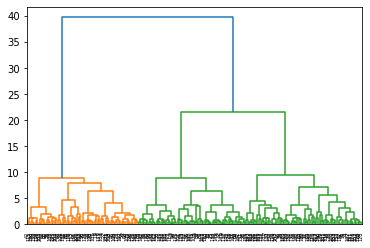

Above Dendrogram indicates all the datapoints have clustered to different clusters by WARDS method.
To find optimal number cluster through which we can solve our business objective, for this we use truncate mode=lastp.
Wherein we can give last p=10 according to industry set base value.


In [29]:
# Answer for 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.
print("Hierarchical clustering on scaled data By WARDS METHOD:")
wardlink = linkage(df1, method = 'ward')
dend = dendrogram(wardlink)
plt.show()
print("Above Dendrogram indicates all the datapoints have clustered to different clusters by WARDS method.")
print("To find optimal number cluster through which we can solve our business objective, for this we use truncate mode=lastp.")
print("Wherein we can give last p=10 according to industry set base value.")

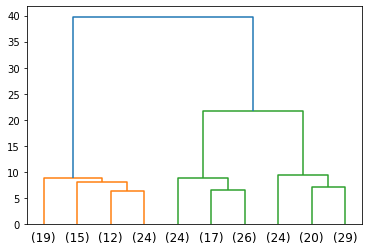

Now we can understand all the datapoints have clustered into 3 clusters.
Next step is to map these clusters to out dataset for that we can use fclusters or agglomerative clustering.
Here we have used criterion 'Maxclust'


In [30]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.show()
print("Now we can understand all the datapoints have clustered into 3 clusters.")
print("Next step is to map these clusters to out dataset for that we can use fclusters or agglomerative clustering.")
print("Here we have used criterion 'Maxclust'")

In [31]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
# FCLUSTER MODULE
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [32]:
df['clusters'] = clusters

In [33]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [34]:
# Cluster Frequency
df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [35]:
# Cluster Profiles
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [36]:
df.drop(['clusters'],axis=1,inplace=True)

In [37]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [38]:
# AGGLOMERATIVE MODULE FOR WARD METHOD
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df1)
print(Cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [39]:
df["Agglo_CLusters"]=Cluster_agglo

In [40]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67


In [41]:
df.drop(['Agglo_CLusters'],axis=1,inplace=True)

In [42]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


Hierarchical clustering on scaled data By AVERAGE METHOD:


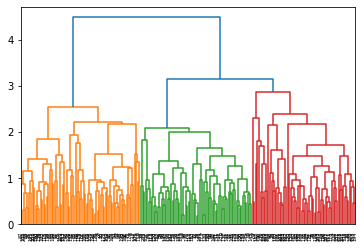

The above Dendrogram indicates all the data points have clustered to different clusters by Average Method.
To find optimal number cluster through which we can solve our business objective, for this we use truncate mode=lastp.
Wherein we can give last p=10 according to industry set base value.


In [43]:
print("Hierarchical clustering on scaled data By AVERAGE METHOD:")
wardlink1 = linkage(df1, method = 'average')
dend1 = dendrogram(wardlink1)
plt.show()
print("The above Dendrogram indicates all the data points have clustered to different clusters by Average Method.")
print("To find optimal number cluster through which we can solve our business objective, for this we use truncate mode=lastp.")
print("Wherein we can give last p=10 according to industry set base value.")

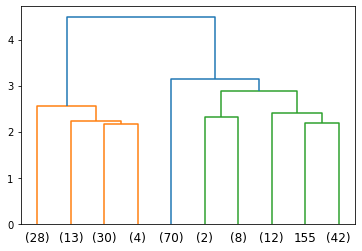

Now we can understand all the datapoints have clustered into 3 clusters.
Next step is to map these clusters to out dataset for that we can use fclusters or agglomerative clustering.
Here we have used criterion 'Maxclust'


In [44]:
dend1 = dendrogram(wardlink1,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.show()
print("Now we can understand all the datapoints have clustered into 3 clusters.")
print("Next step is to map these clusters to out dataset for that we can use fclusters or agglomerative clustering.")
print("Here we have used criterion 'Maxclust'")

In [45]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_average = fcluster(wardlink1, 3, criterion='maxclust')
clusters_average

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [46]:
df['clusters_average']=clusters_average
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_average
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [47]:
# Cluster Frequency
df.clusters_average.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters_average, dtype: int64

In [48]:
# Cluster Profiles
aggdata=df.groupby('clusters_average').mean()
aggdata['Freq']=df.clusters_average.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_average,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


In [49]:
df.drop(['clusters_average'],axis=1,inplace=True)

In [50]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [51]:
# AGGLOMERATIVE MODULE FOR AVERAGE METHOD
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df1)
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [52]:
df["Agglo_CLusters"]=Cluster_agglo

In [53]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'Agglo_CLusters'],
      dtype='object')

In [54]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70


In [55]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_CLusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [56]:
print("Observations:")
print('')
print("Both the methods are almost means, no variation. There is no any difference from both the methods.")
print('')
print("Cluster grouping based on Dendrogram 3 or 4 looks good. Did further analysis and based on the dataset and had gone for 3 group cluster.")
print('')
print("3 group cluster solution gives a pattern based on a Low, Medium & High spending with max_spent_in_single_shopping(high value)")

Observations:

Both the methods are almost means, no variation. There is no any difference from both the methods.

Cluster grouping based on Dendrogram 3 or 4 looks good. Did further analysis and based on the dataset and had gone for 3 group cluster.

3 group cluster solution gives a pattern based on a Low, Medium & High spending with max_spent_in_single_shopping(high value)


In [57]:
df.drop(['Agglo_CLusters'],axis=1,inplace=True)

In [58]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [59]:
# Answer for 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.
# Forming 2 Clusters with K=2
k_means = KMeans(n_clusters = 2,random_state=1)

In [60]:
k_means.fit(df1)

KMeans(n_clusters=2, random_state=1)

In [61]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [62]:
# Within Cluster Sum of Squares
k_means.inertia_

659.14740095485

In [63]:
# Forming clusters with K = 1,2,3,4,5,6 and comparing the WSS
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df1)
k_means.inertia_

1469.999999999999

In [64]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
k_means.inertia_

430.298481751223

In [65]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1)
k_means.inertia_

371.2217639268478

In [66]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1)
k_means.inertia_

326.88464076818576

In [67]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1)
k_means.inertia_

290.1513312373964

In [68]:
print("WSS reduces as K keeps increasing")

WSS reduces as K keeps increasing


In [69]:
# Calculating WSS for other values of K - Elbow Method

In [70]:
wss =[] 

In [71]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [72]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.2217639268478,
 326.88464076818576,
 290.1513312373964,
 263.0291032947616,
 242.81070733171134,
 221.48759698221107,
 206.3290465077041]

In [73]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

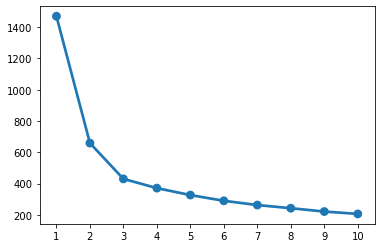

In [74]:
sns.pointplot(a, wss)

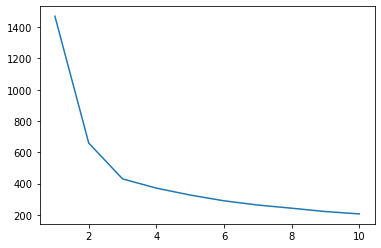

In [75]:
plt.plot(range(1,11), wss)

In [76]:
# silhouette_score for 2 clusters
# KMeans with K=2
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.46560100442748986

In [77]:
# silhouette_score for 3 clusters
# KMeans with K=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.4008059221522216

In [78]:
# silhouette_score for 4 clusters
# KMeans with K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.32943733699973826

In [79]:
# silhouette_score for 5 clusters
# KMeans with K=5
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.28648737247296063

In [80]:
# silhouette_score for 6 clusters
# KMeans with K=6
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.2846550338466801

In [81]:
print("silhouette score for K2=0.46")
print("silhouette score for K3=0.40")
print("silhouette score for K4=0.32")
print("silhouette score for K5=0.28")
print("silhouette score for K6=0.28")
print("Although the Silhouette score is higher for cluster#2(0.46), But statistically 2 clusters are not good for the analysis")
print("and doesn't fullfill the need for clustering.Also,2 clusters really do not make much business impact as it is kind of implicit. So,final clusters will be 3.")

silhouette score for K2=0.46
silhouette score for K3=0.40
silhouette score for K4=0.32
silhouette score for K5=0.28
silhouette score for K6=0.28
Although the Silhouette score is higher for cluster#2(0.46), But statistically 2 clusters are not good for the analysis
and doesn't fullfill the need for clustering.Also,2 clusters really do not make much business impact as it is kind of implicit. So,final clusters will be 3.


In [82]:
# Just to finalise 3 clusters running silhouette score for KMEANS=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.4008059221522216

In [83]:
# Apending Clusters to the Original Dataset
df["Clus_kmeans3"] = labels
df.head()
#print("Above table shows Clusters to the dataset.")

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0


In [84]:
#print("3 Group clusters via K-Means has equal split of percentage of results.")
print("Observations:")
print("Cluster 0: Low ")
print("Cluster 1: High ")
print("Cluster 2: Medium ")
print("By K-Means method we can at cluster 3 we find it optimal after there is no huge drop in inertia values. Also, the elbow curve shows similar results.")
print("The silhouette score of the K-Means also seems to very less value that indicates all the data points are properly clustered to the cluster.")
print("There is no mismatch in the datapoints with regards to clustering.")
print("Cluster grouping based on the Dendrogram 3 or 4 looks good.Did the further analysis and based on the dataset had gone for 3 group cluster.")
print("And 3 group cluster solution gives a pattern based on High/Medium/Low spending with max_spent_in_single_shopping(high value item) and probability_of_full_payment(payment made).")

Observations:
Cluster 0: Low 
Cluster 1: High 
Cluster 2: Medium 
By K-Means method we can at cluster 3 we find it optimal after there is no huge drop in inertia values. Also, the elbow curve shows similar results.
The silhouette score of the K-Means also seems to very less value that indicates all the data points are properly clustered to the cluster.
There is no mismatch in the datapoints with regards to clustering.
Cluster grouping based on the Dendrogram 3 or 4 looks good.Did the further analysis and based on the dataset had gone for 3 group cluster.
And 3 group cluster solution gives a pattern based on High/Medium/Low spending with max_spent_in_single_shopping(high value item) and probability_of_full_payment(payment made).


In [85]:
# Answer for 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.
print("Group 1:Low Spending Group-")
print("Customers should be given reminders for payments.")
print("Offers can be provided on early payment to improve their payment rate.")
print("Tie up with Grocery, Medical shops, Utilities like gas, electricity, phone etc. so that customers will show more interest in spending.")
print('')
print("Group 2:High Spending Group-")
print("Giving any reward points might increase their purchases.")
print("Max_spent_in_single_shopping is high for this group so can be offered discount/offer on next transaction upon full payment.")
print("Increase their credit limit and spending habits.")
print("Give loan against the credit card as they are the customers with good payment record.")
print("Tie up with luxury brands, which will drive more one time maximum spending.")
print('')
print("Group 3: Medium Spending Group-")
print("These are potential target customers who are paying bills and doing purchases and maintaining good credit scores.")
print("Increase their credit limit or lower down the interest rate. Promote new offiers to them on various cards.")
print("Increase spending habits by giving more discounts on hotels, travel airlines etc.")

Group 1:Low Spending Group-
Customers should be given reminders for payments.
Offers can be provided on early payment to improve their payment rate.
Tie up with Grocery, Medical shops, Utilities like gas, electricity, phone etc. so that customers will show more interest in spending.

Group 2:High Spending Group-
Giving any reward points might increase their purchases.
Max_spent_in_single_shopping is high for this group so can be offered discount/offer on next transaction upon full payment.
Increase their credit limit and spending habits.
Give loan against the credit card as they are the customers with good payment record.
Tie up with luxury brands, which will drive more one time maximum spending.

Group 3: Medium Spending Group-
These are potential target customers who are paying bills and doing purchases and maintaining good credit scores.
Increase their credit limit or lower down the interest rate. Promote new offiers to them on various cards.
Increase spending habits by giving more 

In [86]:
# Cluster Profiling
df.Clus_kmeans3.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans3, dtype: int64

In [87]:
#clust_profile=df
clust_profile=df.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [88]:
df.drop(['Clus_kmeans3'],axis=1,inplace=True)

In [89]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


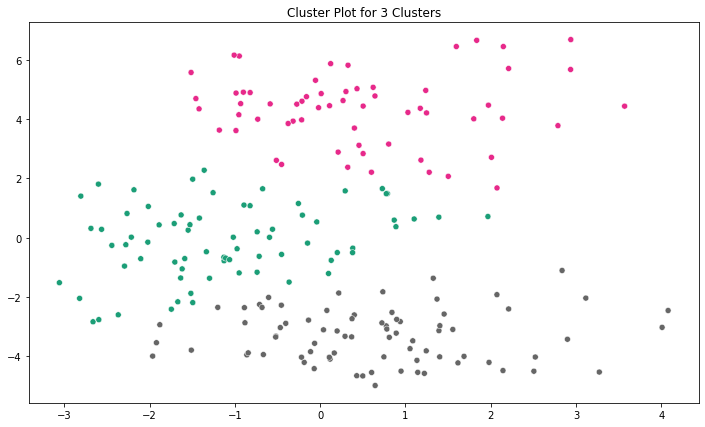

In [90]:
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(df)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=3, random_state=0).fit(df).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 3 Clusters')
plt.show()


In [91]:
#### STARTS 2nd PROBLEM - CART - RF - ANN

In [92]:
# Answer for 2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
df2=pd.read_csv("C:/Users/Rajashri/Downloads/insurance_part2_data.csv")
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [93]:
df2.isnull().values.any()

False

In [94]:
# Size of the dataset
print(df2.shape)
print("The number of rows in the dataset are", df2.shape[0])
print("The number of columns in the dataset are", df2.shape[1])

(3000, 10)
The number of rows in the dataset are 3000
The number of columns in the dataset are 10


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [96]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Are there any duplicates?
dups = df2.duplicated()
print('Number of duplicate values = %d' % (dups.sum()))
df2[dups].head()

Number of duplicate values = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA


<AxesSubplot:>

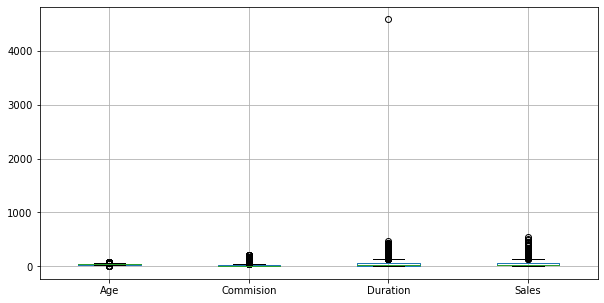

In [98]:
# Checking for Outliers
plt.figure(figsize=(10,5))
df2[['Age','Commision', 'Duration', 'Sales']].boxplot()

In [99]:
df2.skew().round(2)

Age           1.15
Commision     3.15
Duration     13.78
Sales         2.38
dtype: float64

In [100]:
print("Observations:")
print("* The insurance firm dataset has 3000 rows and 10 columns.")
print("* Out of 9 datatypes 2 are integer type, 2 are float and 6 are object types.")
print("* It seems there is no null values present in dataset.")
print("* There are 139 Duplicate records present in the dataset.")
print("* Claimed is the target variable while all others are the predictors.")
print("* Outliers are present in almost all the numeric values which have not treated.")
print('')
print("Basis on describe function, we can find out below summary stats:")
print('')
print("* Age variable has (Mean is 38.09, Standard Deviation is 10.46 with min value 8.0 and max value is 84.00.")
print("also, values for Q1(25% is 32.0), Q2 (50% is 36.00) & Q3 (75% is 42.00).")
print("IQR is Q3-Q1 =",42.00-32.0, "and Range=", 84.00-8.0)
print('')
print("* Commision variable has (Mean is 14.53, Standard Deviation is 25.48 with min value 0 and max value is 210.21.")
print("also, values for Q1(25% is 0.0), Q2 (50% is 4.63) & Q3 (75% is 17.24).")
print("IQR is Q3-Q1 =",17.24-0.0, "and Range=", 210.21-0.0)
print('')
print("* Duration variable has (Mean is 70.00, Standard Deviation is 134.05 with min value -1 and max value is 4580.00.")
print("also, values for Q1(25% is 11.0), Q2 (50% is 26.50) & Q3 (75% is 63.00).")
print("IQR is Q3-Q1 =",63.00-11.0, "and Range=", 4580.00-1)
print('')
print("* Sales variable has (Mean is 60.25, Standard Deviation is 70.73 with min value 0 and max value is 539.00.")
print("also, values for Q1(25% is 20.0), Q2 (50% is 33.00) & Q3 (75% is 69.00).")
print("IQR is Q3-Q1 =",69.00-20.0, "and Range=", 539.00-0.0)
print('')
print("Basis on Skew function:")
print("Age is positively Skewed with 1.15")
print("Commision is positively Skewed with 3.15")
print("Duration is highly positive Skewed with 13.78")
print("Sales is positively Skewed with 2.38")

Observations:
* The insurance firm dataset has 3000 rows and 10 columns.
* Out of 9 datatypes 2 are integer type, 2 are float and 6 are object types.
* It seems there is no null values present in dataset.
* There are 139 Duplicate records present in the dataset.
* Claimed is the target variable while all others are the predictors.
* Outliers are present in almost all the numeric values which have not treated.

Basis on describe function, we can find out below summary stats:

* Age variable has (Mean is 38.09, Standard Deviation is 10.46 with min value 8.0 and max value is 84.00.
also, values for Q1(25% is 32.0), Q2 (50% is 36.00) & Q3 (75% is 42.00).
IQR is Q3-Q1 = 10.0 and Range= 76.0

* Commision variable has (Mean is 14.53, Standard Deviation is 25.48 with min value 0 and max value is 210.21.
also, values for Q1(25% is 0.0), Q2 (50% is 4.63) & Q3 (75% is 17.24).
IQR is Q3-Q1 = 17.24 and Range= 210.21

* Duration variable has (Mean is 70.00, Standard Deviation is 134.05 with min valu

In [101]:
# Getting unique counts of all Nominal Variables
for column in df2[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
                  'Duration', 'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),':',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n*****************************************************\n')

AGE : 70
83      1
77      1
8       1
84      1
14      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64

*****************************************************

AGENCY_CODE : 4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64

*****************************************************

TYPE : 2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64

*****************************************************

CLAIMED : 2
Yes     924
No     2076
Name: Claimed, dtype: int64

*****************************************************

COMMISION : 324
67.75        1
60.00        1
25.13        1
57.40        1
149.50       1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64

*****************************************************

CHANNEL : 2
Offline      46
Online     2954
Name: Channel, dtype: int64

******************************

Univariate/Bivariate analysis helps us to understand the distribution of a data in the dataset. With Univariate analysis we can find the patterns and we can summarize the data.

Univariate Analysis on Age:
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64


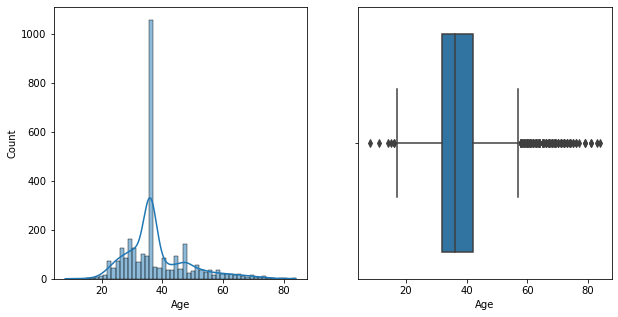

Observations:
* The Boxplot of Age variable shows outliers.
* Age is positively skewed 1.15.


In [102]:
#Exploratory data analysis on (Univariate, Bi-variate, and multivariate analysis).
print("Univariate/Bivariate analysis helps us to understand the distribution of a data in the dataset. With Univariate analysis we can find the patterns and we can summarize the data.")
print('')
print("Univariate Analysis on Age:")
print(df2.Age.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Age, kde=True,ax=axs[0])
sns.boxplot(x='Age',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Age variable shows outliers.")
print("* Age is positively skewed 1.15.")

Univariate Analysis on Commision:
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64


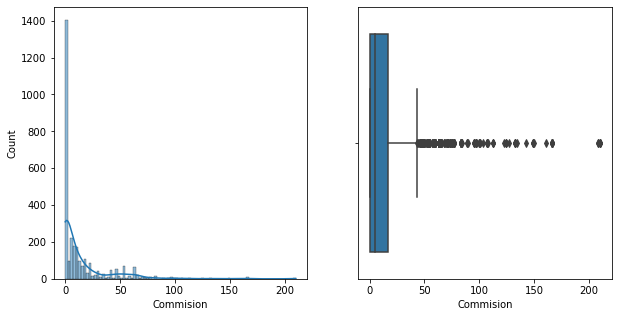

Observations:
* The Boxplot of Commision variable shows outliers.
* The dist plot shows highly right skewed with 3.15.


In [103]:
print("Univariate Analysis on Commision:")
print(df2.Commision.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Commision, kde=True,ax=axs[0])
sns.boxplot(x='Commision',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Commision variable shows outliers.")
print("* The dist plot shows highly right skewed with 3.15.")

Univariate Analysis on Duration:
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64


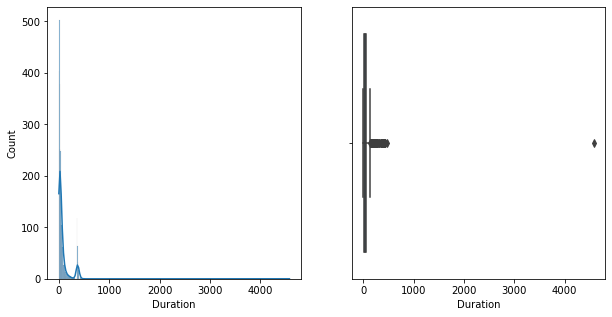

Observations:
* The Boxplot of Duration variable shows outliers.
* The dist plot is right skewed only with 13.78.


In [104]:
print("Univariate Analysis on Duration:")
print(df2.Duration.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Duration, kde=True,ax=axs[0])
sns.boxplot(x='Duration',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Duration variable shows outliers.")
print("* The dist plot is right skewed only with 13.78.")

Univariate Analysis on Sales:
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64


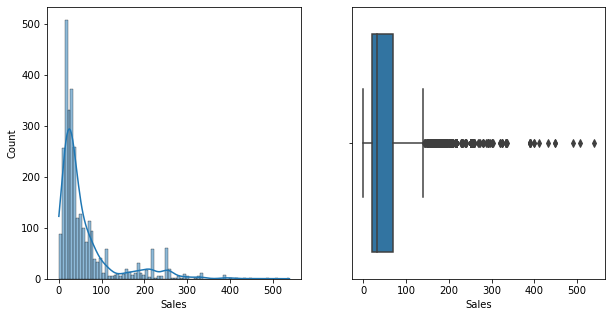

Observations:
* The Boxplot of Sales variable shows outliers.
* The dist plot shows highly right skewed with 2.38.


In [105]:
print("Univariate Analysis on Sales:")
print(df2.Sales.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Sales, kde=True,ax=axs[0])
sns.boxplot(x='Sales',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Boxplot of Sales variable shows outliers.")
print("* The dist plot shows highly right skewed with 2.38.")

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


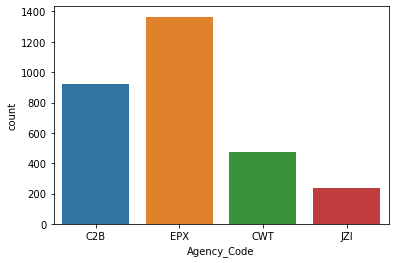

Above countplot shows EPX with high frequency.
Whereas, JZI is with Low frequency.


In [106]:
# Univariate Analysis on Categorical Variables
# AGENCY CODE
print(df2.Agency_Code.value_counts())
sns.countplot(df2['Agency_Code'])
plt.show()
print("Above countplot shows EPX with high frequency.")
print("Whereas, JZI is with Low frequency.")

AxesSubplot(0.125,0.125;0.775x0.755)


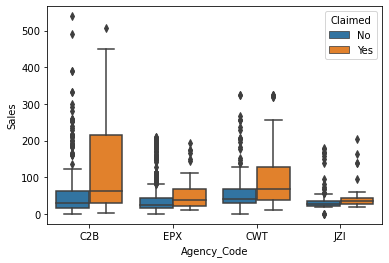

Above Boxplot shows split of Sales with different Agency Code and having hue claimed column.
The Boxplot shows C2B Agency have claimed more claims than other agencies.


In [107]:
# SALES WITH DIFFERENT AGENCY CODE & HUE-CLAIMED
print(sns.boxplot(data=df2, x='Agency_Code',y='Sales',hue='Claimed'))
plt.show()
print("Above Boxplot shows split of Sales with different Agency Code and having hue claimed column.")
print("The Boxplot shows C2B Agency have claimed more claims than other agencies.")

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


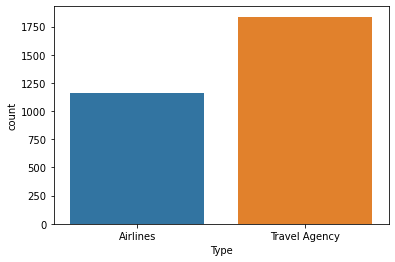

Above countplot shows Travel Agency is with high frequency.


In [108]:
# TYPE
print(df2.Type.value_counts())
sns.countplot(df2['Type'])
plt.show()
print("Above countplot shows Travel Agency is with high frequency.")

AxesSubplot(0.125,0.125;0.775x0.755)


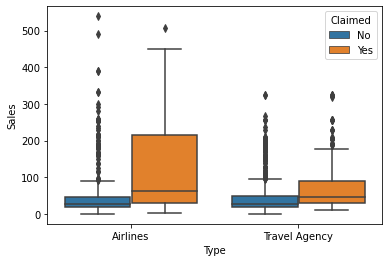

Above Boxplot shows split of Sales with different Types and having hue claimed column.
The Boxplot shows Airlines have claimed more claims than Travel Agency.


In [109]:
# SALES WITH DIFFERENT TYPE & HUE-CLAIMED
print(sns.boxplot(data=df2, x='Type',y='Sales',hue='Claimed'))
plt.show()
print("Above Boxplot shows split of Sales with different Types and having hue claimed column.")
print("The Boxplot shows Airlines have claimed more claims than Travel Agency.")

Online     2954
Offline      46
Name: Channel, dtype: int64


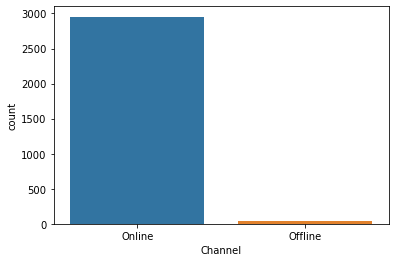

Majority of the customers used Online medium, very less with Offline medium.


In [110]:
# CHANNEL
print(df2.Channel.value_counts())
sns.countplot(df2['Channel'])
plt.show()
print("Majority of the customers used Online medium, very less with Offline medium.")

AxesSubplot(0.125,0.125;0.775x0.755)


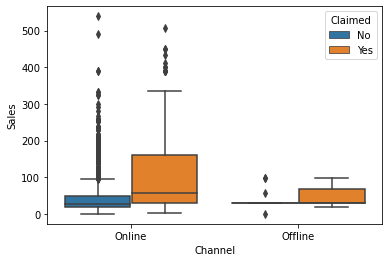

Above Boxplot shows split of Sales with different Channel and having hue claimed column.


In [111]:
# SALES WITH CHANNEL & HUE-CLAIMED
print(sns.boxplot(data=df2, x='Channel',y='Sales',hue='Claimed'))
plt.show()
print("Above Boxplot shows split of Sales with different Channel and having hue claimed column.")

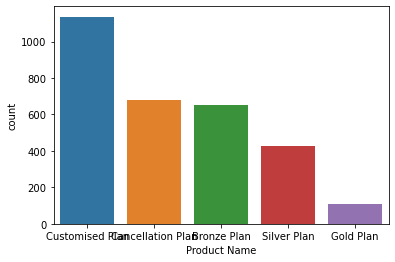

Basis on above countplot Customised plan seems to be most liked plan nby customers when compared to other plans.


In [112]:
# PRODUCT NAME
sns.countplot(data=df2,x='Product Name')
plt.show()
print("Basis on above countplot Customised plan seems to be most liked plan nby customers when compared to other plans.")

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


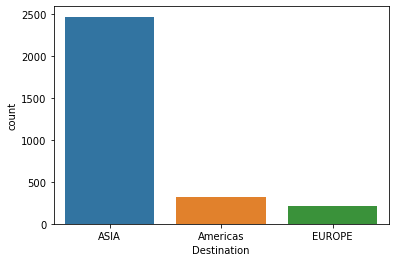

Mostly chosen Destination by customers is Asia with compared to other destination places.


In [113]:
# DESTINATION
print(df2.Destination.value_counts())
sns.countplot(df2['Destination'])
plt.show()
print("Mostly chosen Destination by customers is Asia with compared to other destination places.")

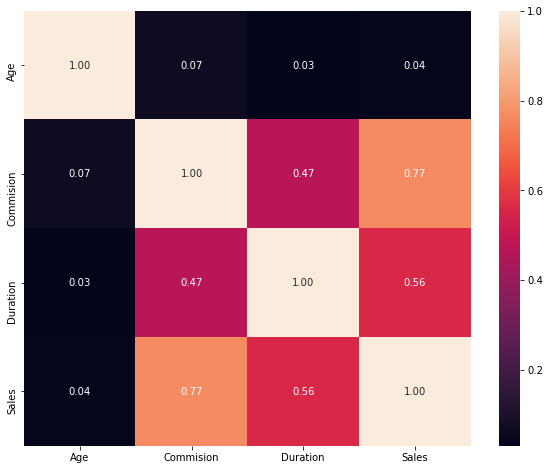

Basis on Heatmap we can see that there is only positive correlation between variables.


In [114]:
# Multivariate Analysis or Checking Correlation with only continuous variables by using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(), annot=True,fmt='.2f');
plt.show()
print("Basis on Heatmap we can see that there is only positive correlation between variables.")

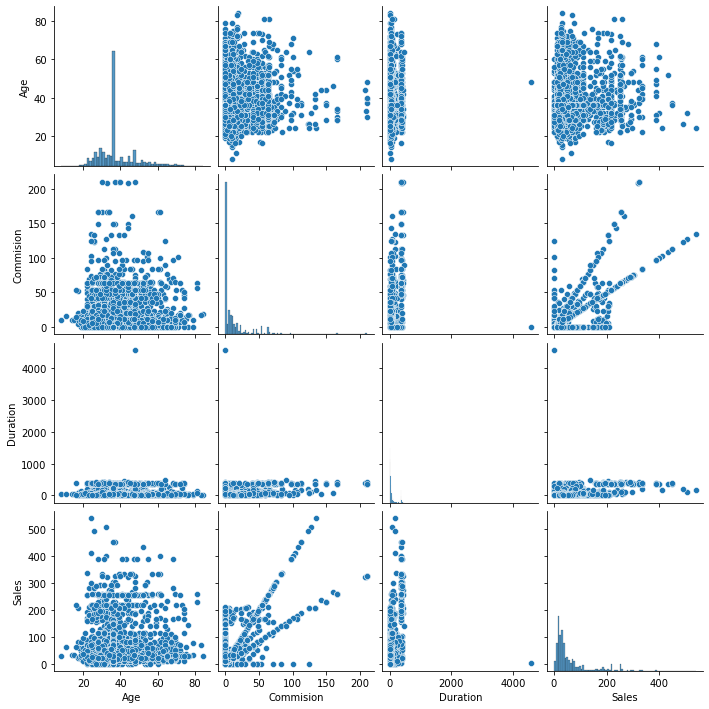

In [115]:
# MULTIVARIATE ANALYSIS BY USING PAIRPLOT
#Checking pairwise distribution of the continuous variables
sns.pairplot(df2[['Age','Commision', 'Duration', 'Sales']])

In [116]:
print("Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types.")
print("The following code loops through each column and checks if the column type is object then converts those columns into")
print("categorical with each distinct value becoming a category or code.")
print("Hence, Converting all objects to categorical codes.")

Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types.
The following code loops through each column and checks if the column type is object then converts those columns into
categorical with each distinct value becoming a category or code.
Hence, Converting all objects to categorical codes.


In [117]:
# Answer for 2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [119]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [120]:
# Proportion of 1s and 0s
print(df2.Claimed.value_counts(normalize=True))
print('')
print("There is no issue of class imbalance here as we have reasonable proportions in both the classes.")

0    0.692
1    0.308
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes.


In [121]:
# Extracting the target column into separate vectors for training set and test set
X = df2.drop("Claimed", axis=1)

y = df2.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [122]:
# Splitting data into training and test set
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [123]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [124]:
# Building a Decision Tree Classifier
dt_model=DecisionTreeClassifier(criterion='gini')

In [125]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [126]:
# Finding Best Parameters using best grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [8,10,12,14],
    'min_samples_leaf': [30,50,70], 
    'min_samples_split': [100,150,200]
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10,scoring='recall')

In [127]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=30, min_samples_split=200,
                       random_state=1)

In [128]:
# Generating Tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [129]:
# Variable Importance
print(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.577064
Sales         0.247480
Product Name  0.073709
Duration      0.037659
Age           0.035232
Commision     0.021716
Type          0.007140
Channel       0.000000
Destination   0.000000


In [130]:
# Predicting on Training and Test dataset
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [131]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [132]:
ytest_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [133]:
# Getting the Predicted Classes and Probs
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.555556,0.444444
2,0.348101,0.651899
3,0.154286,0.845714
4,0.909774,0.090226


AUC: 0.840


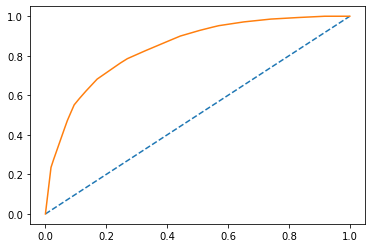

In [134]:
# Model Evaluation
# AUC and ROC for the training data
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.803


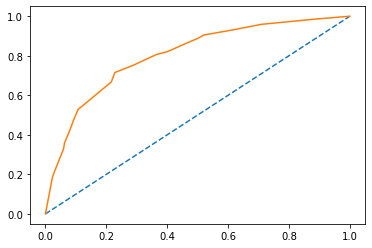

In [135]:
# AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [136]:
#Confusion Matrix for the training data
confusion_matrix(train_labels, ytrain_predict)

array([[1332,  139],
       [ 282,  347]], dtype=int64)

In [137]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7995238095238095

In [138]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1471
           1       0.71      0.55      0.62       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.80      0.79      2100



In [139]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.71
cart_train_recall  0.55
cart_train_f1  0.62


In [140]:
#Confusion Matrix for test data
confusion_matrix(test_labels, ytest_predict)

array([[557,  48],
       [171, 124]], dtype=int64)

In [141]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7566666666666667

In [142]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



In [143]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.42
cart_test_f1  0.53


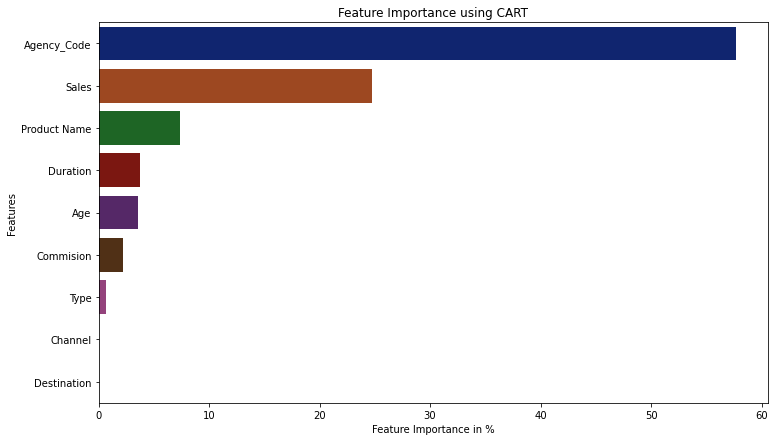

In [144]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART')
plt.show()

In [145]:
print("Cart Conclusion")
print('')
print("TRAIN DATA:")
print("AUC: 84%")
print("Accuracy: 79%")
print("Precision: 71%")
print("f1-Score: 62%")
print('')
print("TEST DATA:")
print("AUC: 80%")
print("Accuracy: 75%")
print("Precision: 72%")
print("f1-Score: 53%")
print('')
print("Training and Test set results are almost similar, and with the overall measures high, the model is a good model.")

Cart Conclusion

TRAIN DATA:
AUC: 84%
Accuracy: 79%
Precision: 71%
f1-Score: 62%

TEST DATA:
AUC: 80%
Accuracy: 75%
Precision: 72%
f1-Score: 53%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.


In [146]:
# Building a Random Forest Classifier
# Grid Search for finding out the optimal values for the hyper parameters
print("Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher")
print("execution time, so the best values that came after the search are directly put in Param_grid.")

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher
execution time, so the best values that came after the search are directly put in Param_grid.


In [147]:
rfcl=RandomForestClassifier( n_estimators=500,
                            oob_score=True,max_depth=10,
                            max_features=5,
                            min_samples_leaf=21,
                            min_samples_split=60)

In [148]:
rfcl.fit(X_train,train_labels)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=21,
                       min_samples_split=60, n_estimators=500, oob_score=True)

In [149]:
rfcl.oob_score_

0.7857142857142857

In [150]:
param_grid = {
    'max_depth': [10,12],
    'max_features': [5],
    'min_samples_leaf': [10],
    'min_samples_split': [50],
    'n_estimators': [101]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [151]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 12], 'max_features': [5],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [101]})

In [152]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 101}

In [153]:
best_grid = grid_search.best_estimator_

In [154]:
best_grid

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=101, random_state=1)

In [155]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [156]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [157]:
ytest_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [158]:
# RF Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict)

array([[1334,  137],
       [ 247,  382]], dtype=int64)

In [159]:
# Accuracy on Train Data by RF Model
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8171428571428572

In [160]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [161]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2.loc["1"][0],2)
rf_train_recall=round(df2.loc["1"][1],2)
rf_train_f1=round(df2.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


Area under Curve is 0.8708621045566702


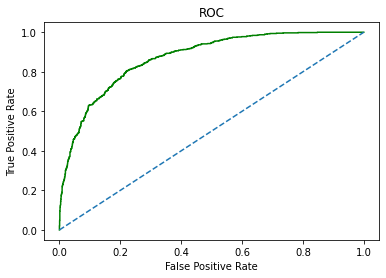

In [162]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [163]:
# RF Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict)

array([[551,  54],
       [154, 141]], dtype=int64)

In [164]:
# Accuracy on Test Data
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7688888888888888

In [165]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [166]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2.loc["1"][0],2)
rf_test_recall=round(df2.loc["1"][1],2)
rf_test_f1=round(df2.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.48
rf_test_f1  0.58


Area under Curve is 0.8201933043843677


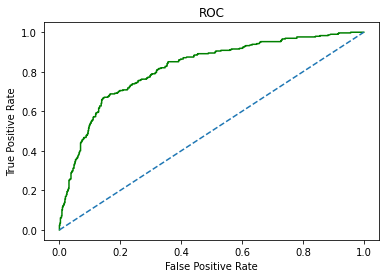

In [167]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [168]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.346358
Sales         0.175521
Product Name  0.156382
Commision     0.110096
Duration      0.091698
Age           0.061004
Type          0.051138
Destination   0.007029
Channel       0.000773


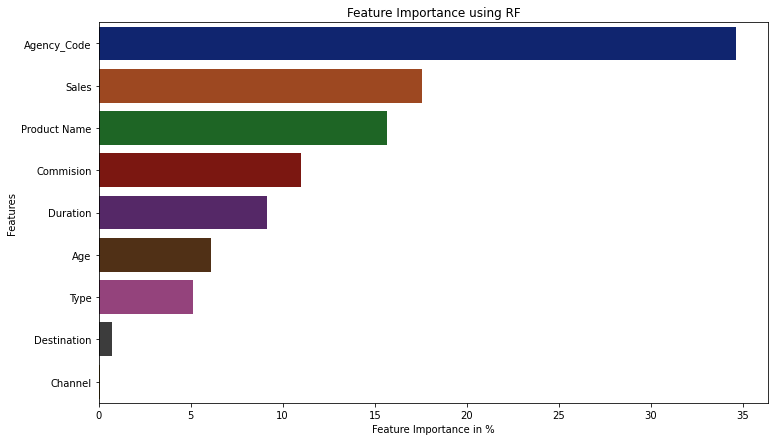

In [169]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [170]:
print("Random Forest Conclusion")
print('')
print("TRAIN DATA:")
print("AUC: 87%")
print("Accuracy: 81%")
print("Precision: 74%")
print("f1-Score: 67%")
print('')
print("TEST DATA:")
print("AUC: 82%")
print("Accuracy: 76%")
print("Precision: 72%")
print("f1-Score: 58%")
print('')
print("Training and Test set results are quite similar, and accuracy is also good,hence the model is a good model.")
print("Agency_Code is again the most important variable for predicting insurance claimed.")

Random Forest Conclusion

TRAIN DATA:
AUC: 87%
Accuracy: 81%
Precision: 74%
f1-Score: 67%

TEST DATA:
AUC: 82%
Accuracy: 76%
Precision: 72%
f1-Score: 58%

Training and Test set results are quite similar, and accuracy is also good,hence the model is a good model.
Agency_Code is again the most important variable for predicting insurance claimed.


In [171]:
# Building a Neural Network Classifier
# Scaling the data for Neural Network Classifier
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [172]:
X_test=sc.fit_transform(X_test)
X_test

array([[-1.49978174, -0.37871154,  0.7736789 , ...,  0.26442756,
        -1.27446364,  3.15805419],
       [ 1.52237158, -1.38711506, -1.29252588, ..., -0.4636747 ,
        -1.27446364, -0.42385982],
       [-0.85871892, -1.38711506, -1.29252588, ..., -0.62130508,
        -1.27446364, -0.42385982],
       ...,
       [-0.21765609, -1.38711506, -1.29252588, ..., -0.45616849,
        -1.27446364, -0.42385982],
       [ 0.97288916,  1.6380955 , -1.29252588, ..., -0.41113124,
        -1.27446364, -0.42385982],
       [-0.3092365 ,  1.6380955 , -1.29252588, ..., -0.47118091,
        -1.27446364, -0.42385982]])

In [173]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [174]:
clf.fit(X_train,train_labels)

Iteration 1, loss = 0.64459932
Iteration 2, loss = 0.62689739
Iteration 3, loss = 0.60662904
Iteration 4, loss = 0.58889576
Iteration 5, loss = 0.57375106
Iteration 6, loss = 0.56124855
Iteration 7, loss = 0.55072503
Iteration 8, loss = 0.54232804
Iteration 9, loss = 0.53526864
Iteration 10, loss = 0.52917396
Iteration 11, loss = 0.52400864
Iteration 12, loss = 0.51943619
Iteration 13, loss = 0.51564861
Iteration 14, loss = 0.51213112
Iteration 15, loss = 0.50922260
Iteration 16, loss = 0.50660266
Iteration 17, loss = 0.50425722
Iteration 18, loss = 0.50217408
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [175]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [176]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [177]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [178]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [179]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [180]:
ytest_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [181]:
# NN Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict)

array([[1326,  145],
       [ 322,  307]], dtype=int64)

In [182]:
# Accuracy on Train Data by NN Model
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7776190476190477

In [183]:
# Classification Report
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1471
           1       0.68      0.49      0.57       629

    accuracy                           0.78      2100
   macro avg       0.74      0.69      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [184]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.49
nn_train_f1  0.57


Area under Curve is 0.8156175730254989


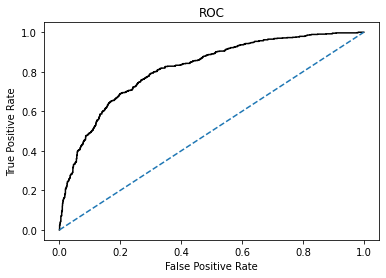

In [185]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [186]:
# NN Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict)

array([[555,  50],
       [165, 130]], dtype=int64)

In [187]:
# Accyracy on Test Data by NN Model
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7611111111111111

In [188]:
# Classification Report
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [189]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.72
nn_test_recall  0.44
nn_test_f1  0.55


Area under Curve is 0.8005462949992996


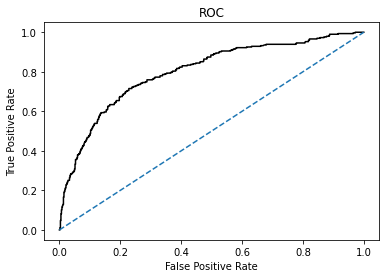

In [190]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [191]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

In [192]:
print("Neural Network Conclusion:")
print("Train Data:")
print("AUC: 81%")
print("Accuracy: 77%")
print("Precision: 68%")
print("f1-Score: 57%")
print('')
print("Test Data:")
print("AUC: 80%")
print("Accuracy: 76%")
print("Precision: 72%")
print("f1-Score: 55%")
print('')
print("Training and Test set results are almost similar, and with the overall measures high, the model is a good model.")

Neural Network Conclusion:
Train Data:
AUC: 81%
Accuracy: 77%
Precision: 68%
f1-Score: 57%

Test Data:
AUC: 80%
Accuracy: 76%
Precision: 72%
f1-Score: 55%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.


In [193]:
# Answer for 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.
print("We have the results available for Train & Test data in each model, also updated in Business report under answer for 2.3")

We have the results available for Train & Test data in each model, also updated in Business report under answer for 2.3


In [194]:
# Answer for 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.
# Comparison of the performance metrics from the 3 models
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.76,0.82,0.77,0.78,0.76
AUC,0.84,0.80,0.87,0.82,0.82,0.80
Recall,0.55,0.42,0.61,0.48,0.49,0.44
Precision,0.71,0.72,0.74,0.72,0.68,0.72
F1 Score,0.62,0.53,0.67,0.58,0.57,0.55


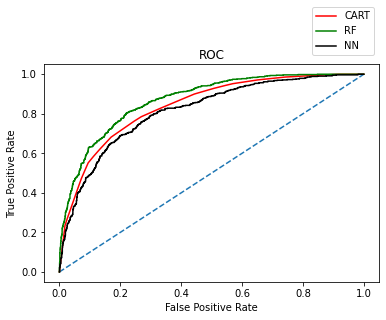

In [195]:
# ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

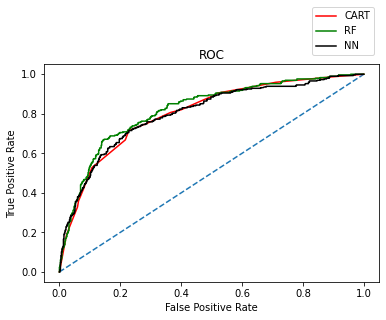

In [196]:
# ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [197]:
print("Conclusion:")
print("Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model.")
print("RF Model has better Accuracy, Precision, Recall & F1 Score better than other models.")

Conclusion:
Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model.
RF Model has better Accuracy, Precision, Recall & F1 Score better than other models.


In [198]:
# Answer for 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
print("Based on the whole analysis below are the observations and some recommendations:")
print('')
print("Insights:")
print("* Looking at the model, more data will help us understands and predicts model better.")
print('')
print("* Streamlining Online experiances benefited customers,leading to an increase in conversions which subsequently raised profits.")
print('')
print("* As per the data 90% of the insurance is done by Online Channel.")
print('')
print("* Other interesting fact is, almost all Offline business has a claimed associated.")
print('')
print("* Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency.")
print('')
print("* Also, based on the model we are getting 80% accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern.")
print('')
print("* Basis on analysis we can see that more sales are happen via Agency than Airlines and trend shows the claims are processed moe at Airline. So we may need to deep dive into the process to understand the workflow,and root cause and why it is happening.")
print('')
print("Recommendations:")
print('')
print("* Key perfomance Indicators(KPI) of insurance claims are:")
print('')
print("* Increase customer satisfaction which will give more revenue")
print('')
print("* Combat fraud transactions, deploy some method or applications to identify fradulant transaction ASAP.")
print('')
print("* Optimize claims recovery method")
print('')
print("* Reduce Claim handeling costs")

Based on the whole analysis below are the observations and some recommendations:

Insights:
* Looking at the model, more data will help us understands and predicts model better.

* Streamlining Online experiances benefited customers,leading to an increase in conversions which subsequently raised profits.

* As per the data 90% of the insurance is done by Online Channel.

* Other interesting fact is, almost all Offline business has a claimed associated.

* Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency.

* Also, based on the model we are getting 80% accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern.

* Basis on analysis we can see that more sales are happen via Agency than Airlines and trend shows the claims are processed moe at Airline. So we may need to deep dive into the process to unders